# Customer Attrition Analysis

**Dataset Info:**
Data Set containing Telecom customer details

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

**Load the dataset **

In [2]:
telecom_base_data = pd.read_csv('F:\\RESMI\\DS&ML_PRJ\\Internship\\Data\\verizonet_data.csv')

Look at the top 5 records of data

In [3]:
telecom_base_data.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
telecom_base_data.shape

(7043, 43)

In [5]:
telecom_base_data.columns.values

array(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'City', 'Zip Code', 'Population', 'Churn Status',
       'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'], dtype=object)

In [5]:
# Checking the data types of all the columns
telecom_base_data.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

In [6]:
# Check the descriptive statistics of numeric variables
telecom_base_data.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


#Insights
25% customers have more than 3 Referrals.

75% customers have tenure less than 55 months.

Average Monthly GB Download for 25% customers is more than 28 and the maximum value goes upto 94.

Average Monthly charges are USD 65.53 whereas 25% customers pay more than USD 90.65 per month.

25% customers are in the status of churn.

25% customers have reported Product/Service Issues. 

Customer Satisfaction rate has only 1834 values.

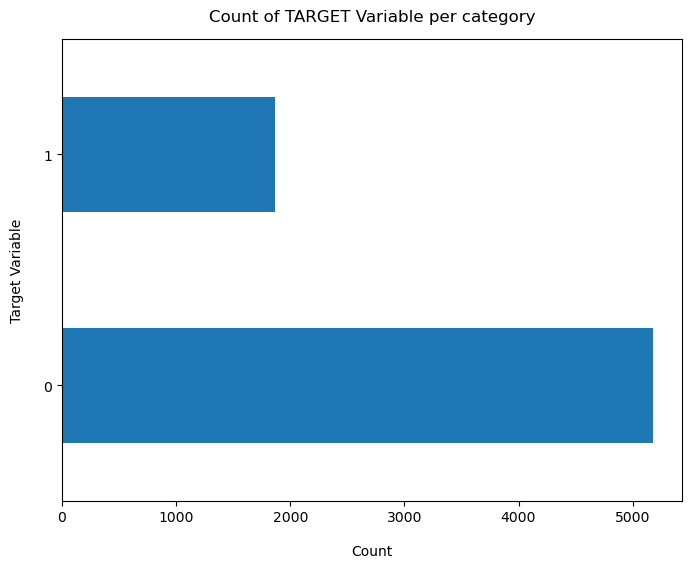

In [8]:
telecom_base_data['Churn Status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*telecom_base_data['Churn Status'].value_counts()/len(telco_base_data['Churn Status'])

Churn Status
0    73.463013
1    26.536987
Name: count, dtype: float64

In [38]:
telecom_base_data['Churn Status'].value_counts()

0    5174
1    1869
Name: Churn Status, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [39]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telecom_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

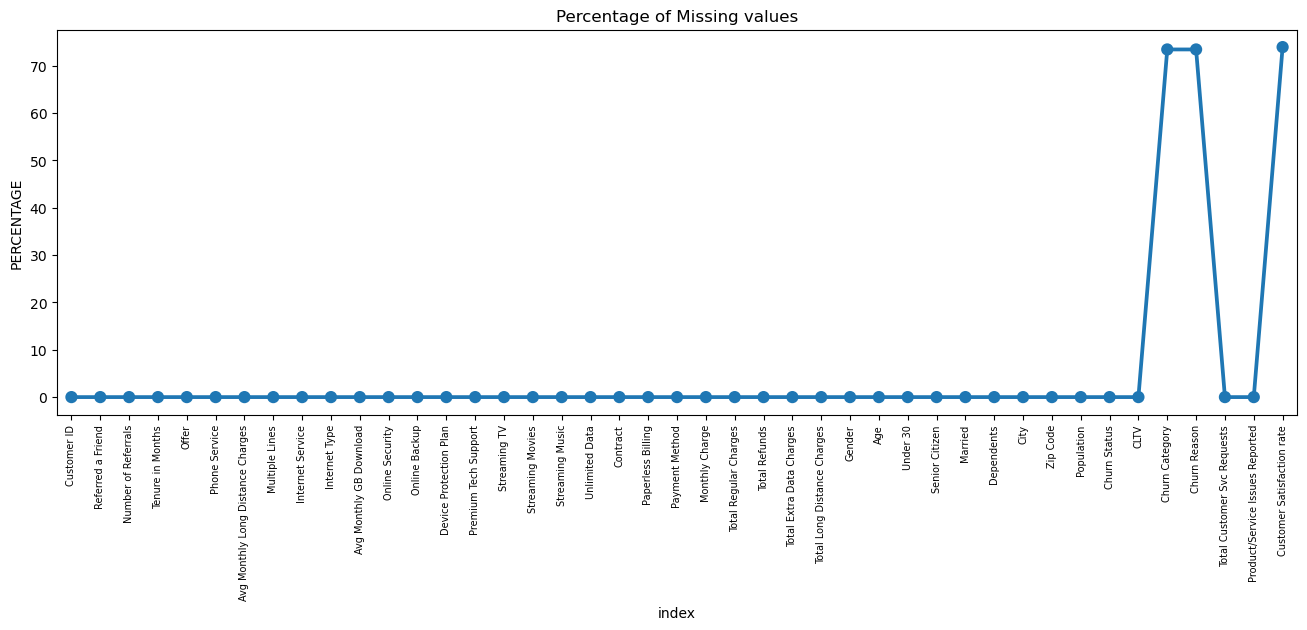

In [40]:
missing = pd.DataFrame((telecom_base_data.isnull().sum()) * 100 / telecom_base_data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Specify x and y parameters
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we have missing data in 3 columns.

General Thumb Rules:

* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.so, the 3 columns are going to be dropped.


In [41]:
# Set a threshold for the percentage of missing values
threshold = 30  # You can adjust this threshold as needed

# Calculate the percentage of missing values for each column
missing_percentages = (telecom_base_data.isnull().sum() / len(telecom_base_data)) * 100

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_percentages[missing_percentages > threshold].index

# Drop columns with high missing values
telecom_base_data_dropped = telecom_base_data.drop(columns=columns_to_drop)

# Display information about the dropped columns
print(f"Dropped columns: {columns_to_drop}")
print(f"Shape after dropping columns: {telecom_base_data_dropped.shape}")

Dropped columns: Index(['Churn Category', 'Churn Reason', 'Customer Satisfaction rate'], dtype='object')
Shape after dropping columns: (7043, 40)


In [11]:
telecom_base_data_dropped

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Senior Citizen,Married,Dependents,City,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,Yes,No,No,Los Angeles,90022,68701,1,5433,5,0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Yes,Yes,Yes,Los Angeles,90063,55668,1,5302,5,0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Yes,No,Yes,Los Angeles,90065,47534,1,3179,1,0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Yes,Yes,Yes,Inglewood,90303,27778,1,5337,1,1
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Yes,Yes,Yes,Whittier,90602,26265,1,2793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,No,No,No,Landers,92285,2182,0,5306,0,0
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,No,Yes,Yes,Adelanto,92301,18980,0,2140,2,0
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,No,Yes,Yes,Amboy,92304,42,0,5560,2,0
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,No,Yes,Yes,Angelus Oaks,92305,301,0,2793,0,0


## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [59]:
telecom_data = telecom_base_data_dropped.copy()

In [60]:
telecom_data.isnull().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

As we can see there are no missing values in the dataset.

#Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [61]:
# Get the max tenure
print(telecom_data['Tenure in Months'].max()) #72

72


In [62]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telecom_data['Tenure in Months'] = pd.cut(telecom_data['Tenure in Months'], range(1, 80, 12), right=False, labels=labels)

In [63]:
telecom_data['Tenure in Months'].value_counts()

1 - 12     2186
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure in Months, dtype: int64

** Remove columns not required for processing

In [64]:
#drop column customerID and tenure
telecom_data.drop(columns= ['Customer ID','City','Zip Code','Population','Age','Referred a Friend','Avg Monthly GB Download','Avg Monthly Long Distance Charges','CLTV','Total Refunds','Total Extra Data Charges','Total Long Distance Charges'], axis=1, inplace=True)
telecom_data.head()

,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,...,Monthly Charge,Total Regular Charges,Gender,Under 30,Senior Citizen,Married,Dependents,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported
0,0,1 - 12,None,No,No,Yes,Fiber Optic,No,No,Yes,...,41.236,39.65,Male,No,Yes,No,No,1,5,0
1,1,1 - 12,Offer E,Yes,Yes,Yes,Cable,No,Yes,No,...,83.876,633.30,Female,No,Yes,Yes,Yes,1,5,0
2,0,13 - 24,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,...,99.268,1752.55,Male,No,Yes,No,Yes,1,1,0
3,1,25 - 36,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,...,102.440,2514.50,Female,No,Yes,Yes,Yes,1,1,1
4,1,37 - 48,Offer C,Yes,Yes,Yes,Cable,No,No,No,...,79.560,2868.15,Female,No,Yes,Yes,Yes,1,1,0


# Data Exploration

1.Plot distibution of individual predictors by churn

## Univariate Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_9712\4141361036.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


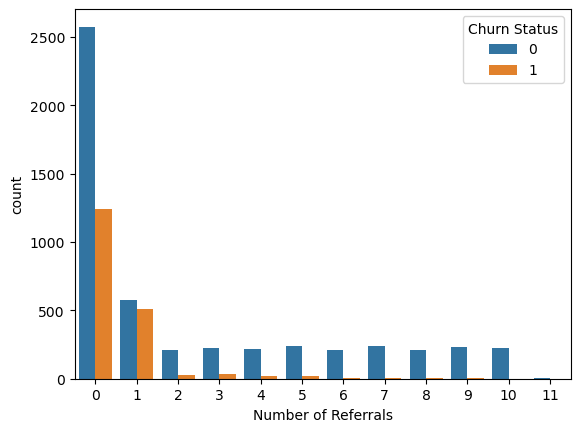

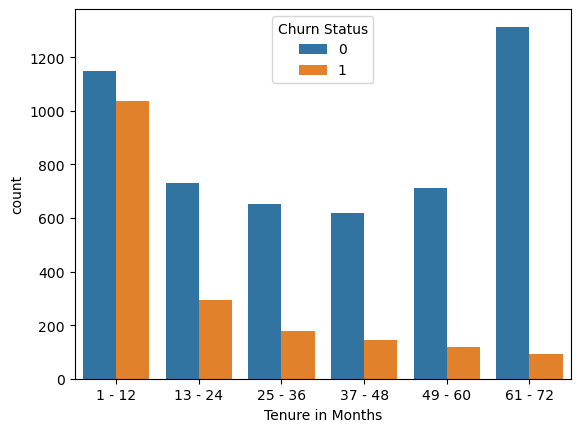

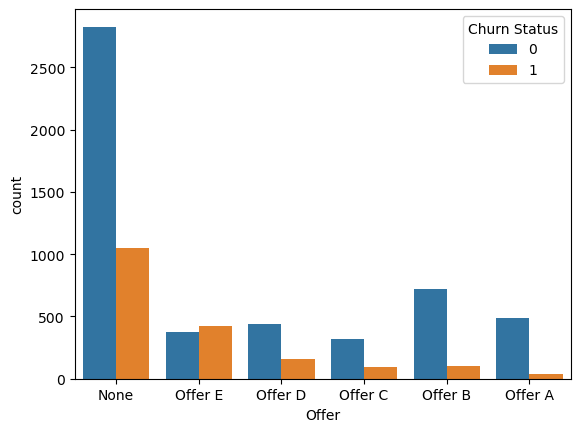

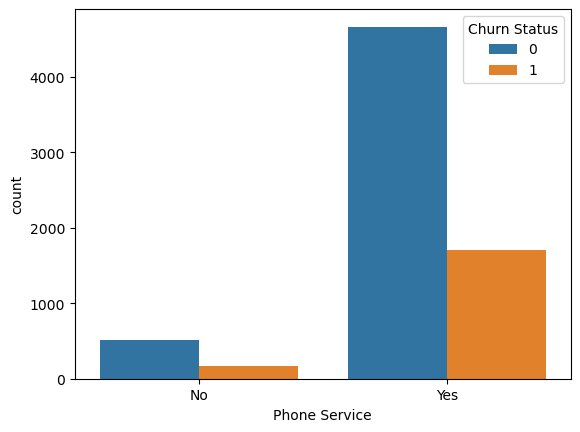

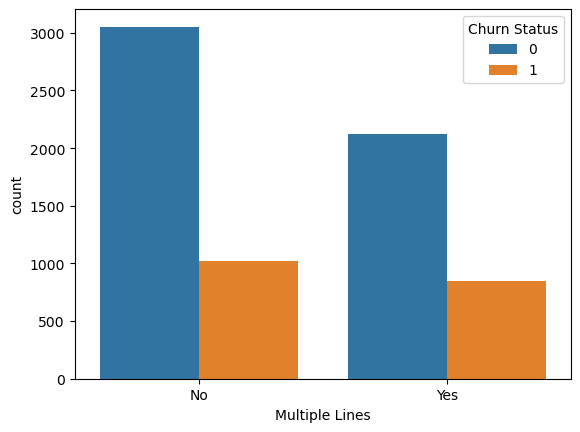

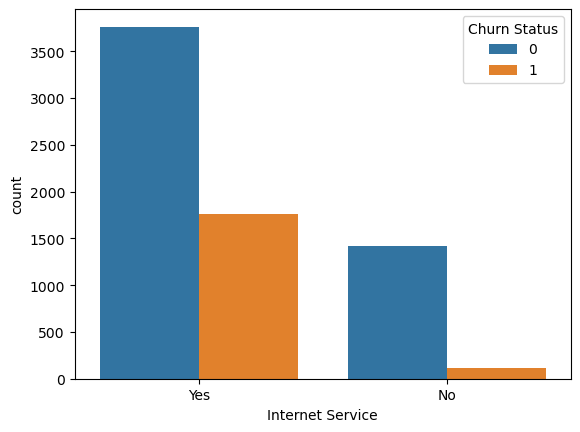

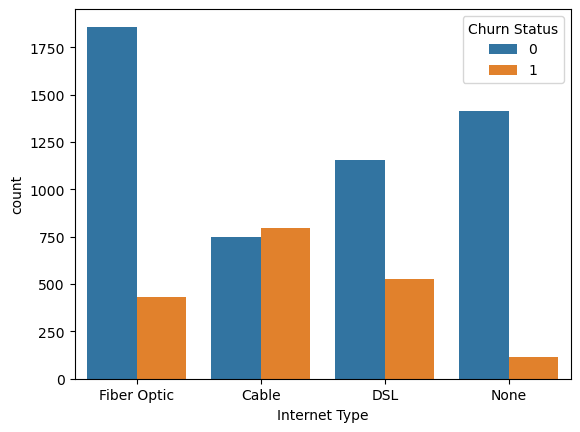

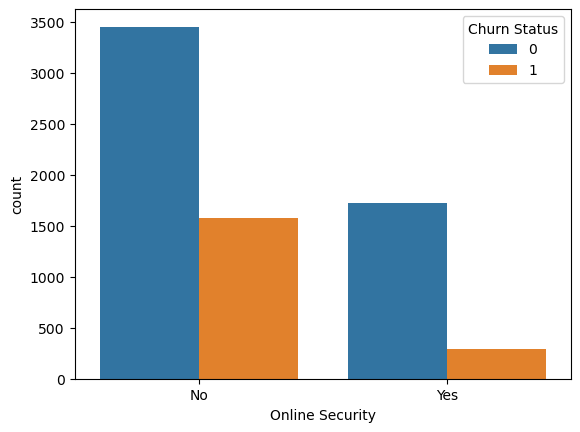

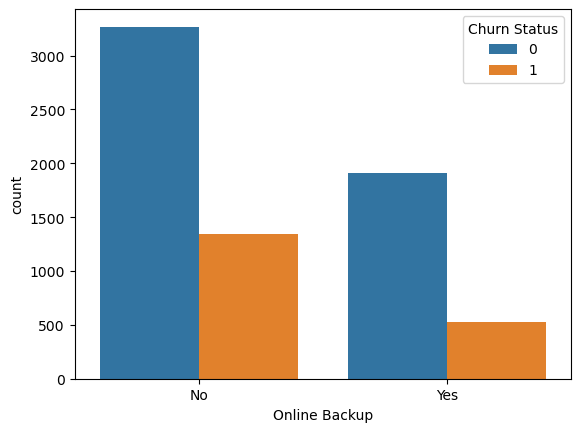

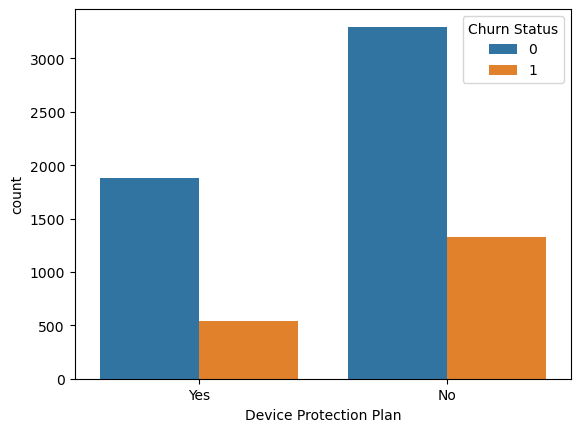

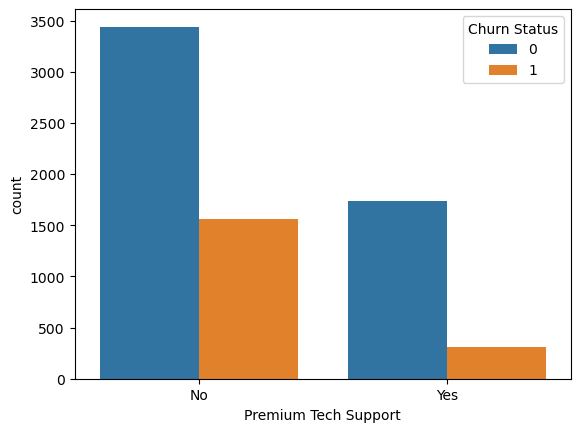

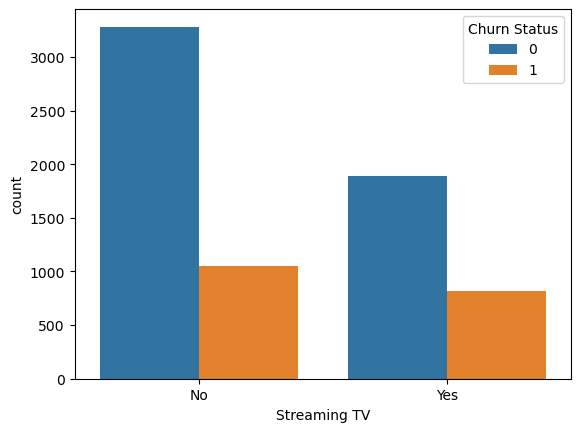

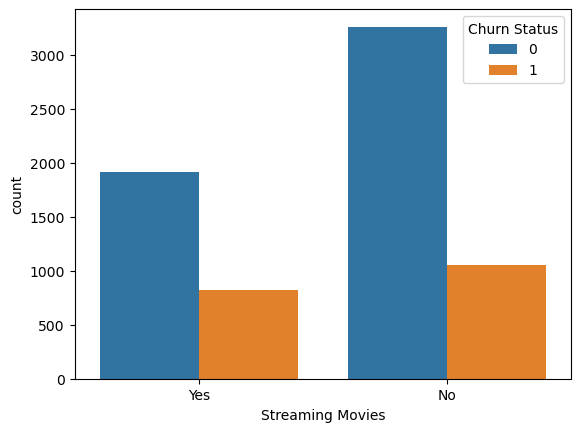

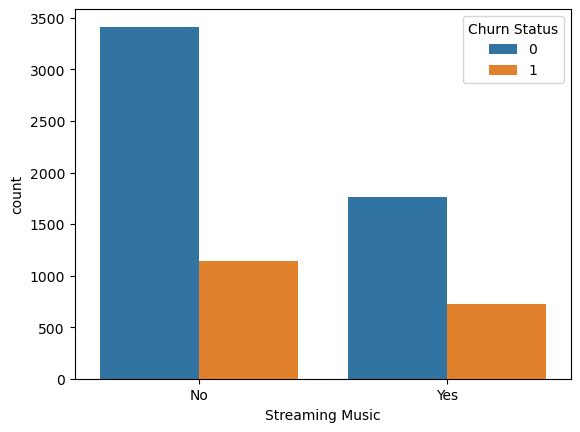

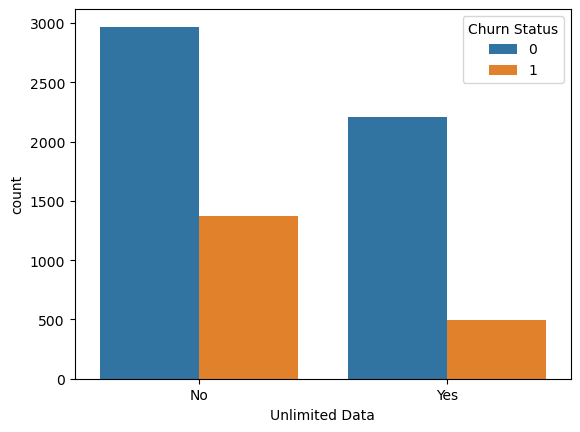

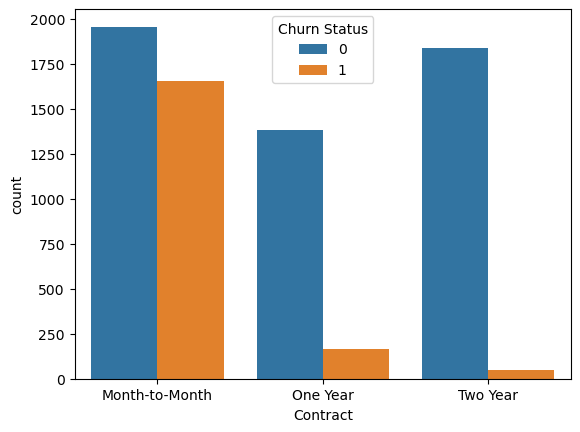

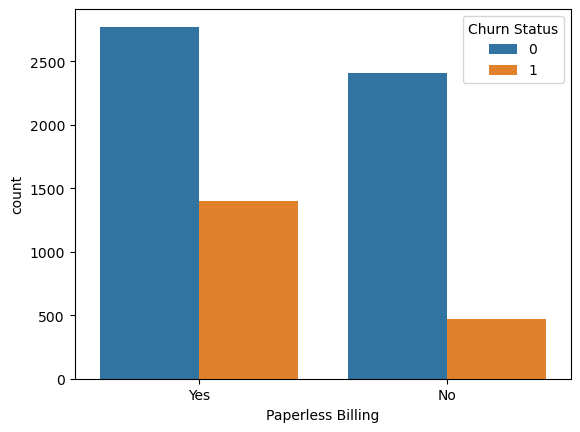

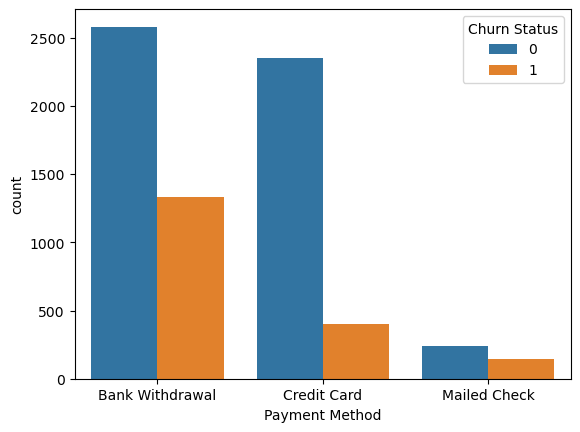

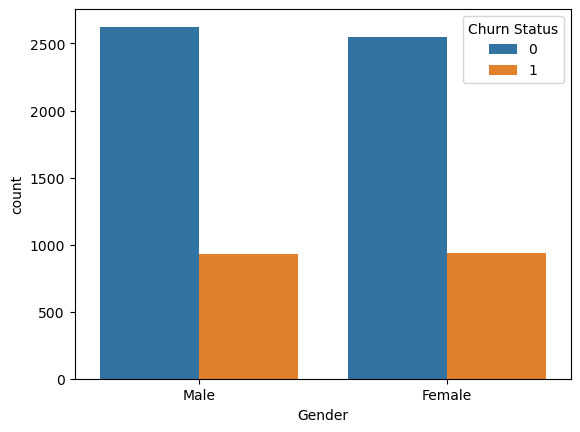

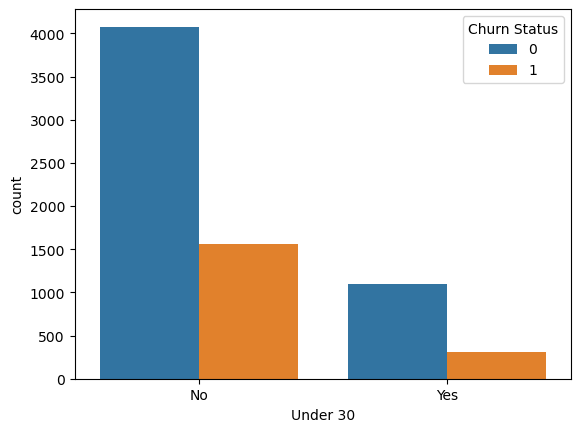

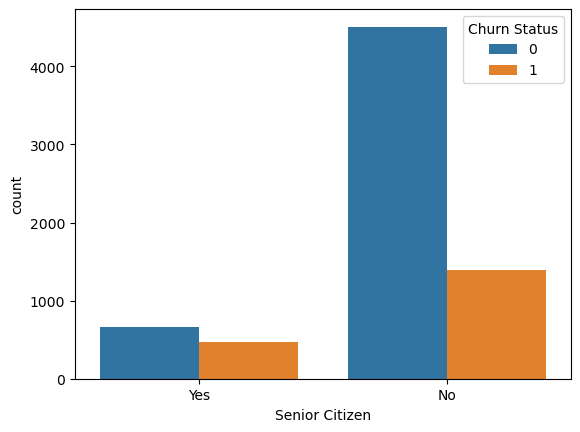

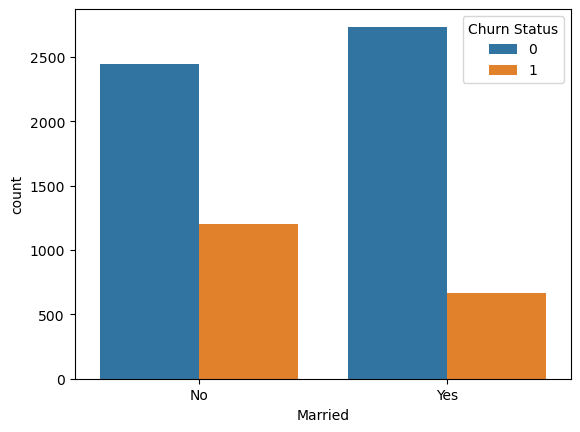

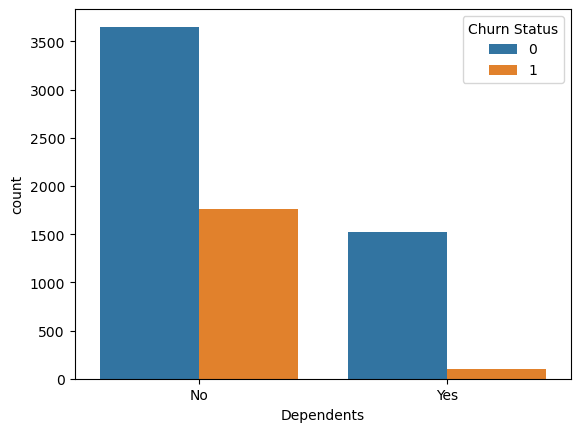

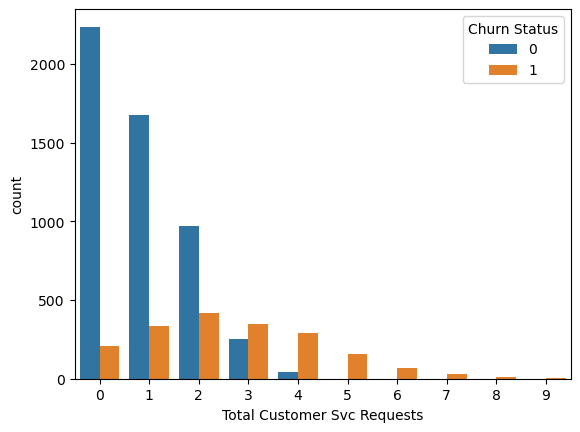

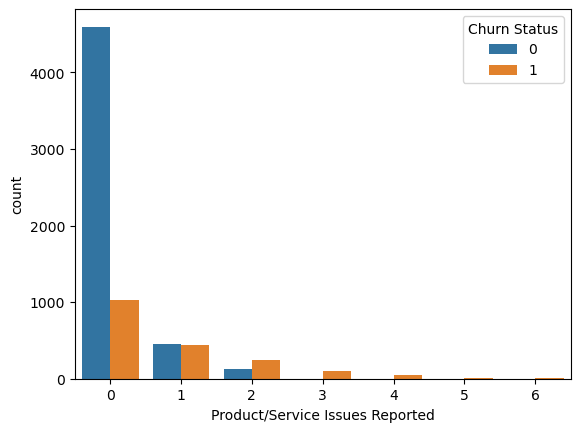

In [65]:
for i, predictor in enumerate(telecom_data.drop(columns=['Churn Status', 'Total Regular Charges', 'Monthly Charge'])):
    plt.figure(i)
    sns.countplot(data=telecom_data, x=predictor, hue='Churn Status')

2.Convert all the categorical variables into dummy variables

In [66]:
telecom_data_dummies = pd.get_dummies(telecom_data)
telecom_data_dummies.head()

,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,41.236,39.65,1,5,0,1,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,83.876,633.30,1,5,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,99.268,1752.55,1,1,0,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
3,1,102.440,2514.50,1,1,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,1
4,1,79.560,2868.15,1,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1


Relationship between Monthly Charges and Total Charges

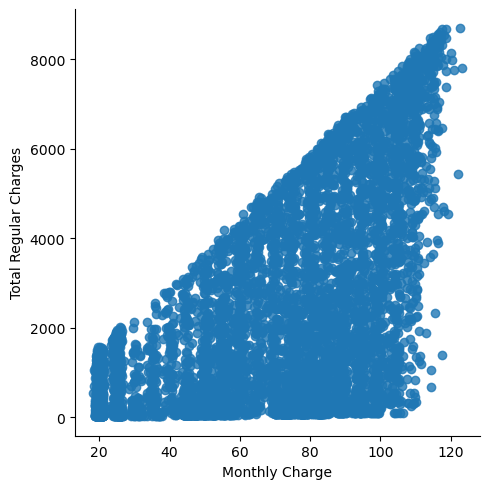

In [67]:
sns.lmplot(data=telecom_data_dummies, x='Monthly Charge', y='Total Regular Charges', fit_reg=False)

Total Regular Charges increase as Monthly Charges increase.

Churn by Monthly Charges and Total Charges
-----------------------------------------------------------------

#*******#

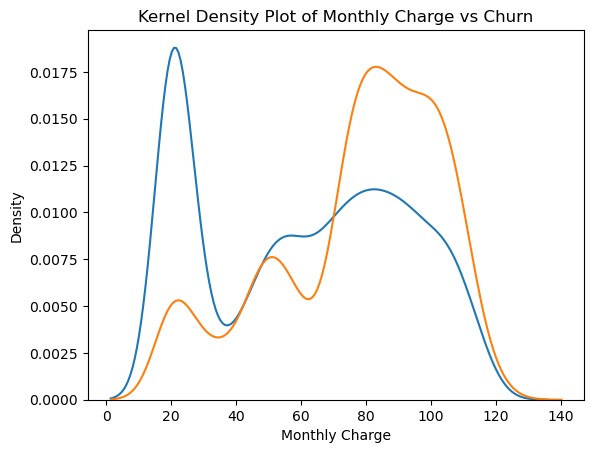

In [69]:
Month = sns.kdeplot(telecom_data_dummies['Monthly Charge'][(telecom_data_dummies['Churn Status'] == 0)])
Month = sns.kdeplot(telecom_data_dummies['Monthly Charge'][(telecom_data_dummies['Churn Status'] == 1)])
# Add labels and title
Month.set(xlabel='Monthly Charge', ylabel='Density', title='Kernel Density Plot of Monthly Charge vs Churn')

# Show the plot
plt.show()


Churn is high when Monthly Charges are high

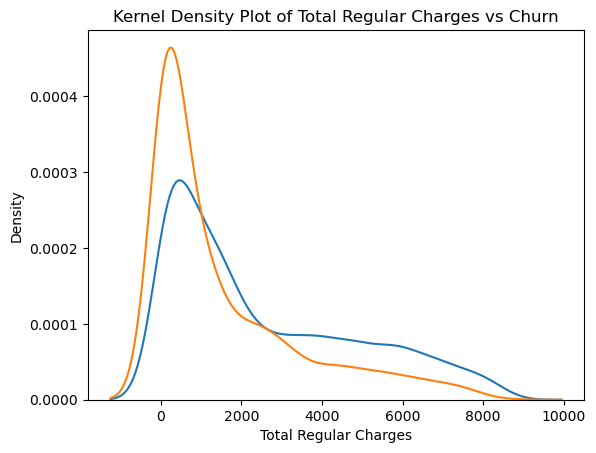

In [35]:
total = sns.kdeplot(telecom_data_dummies['Total Regular Charges'][(telecom_data_dummies['Churn Status'] == 0)])
total = sns.kdeplot(telecom_data_dummies['Total Regular Charges'][(telecom_data_dummies['Churn Status'] == 1)])
# Add labels and title
total.set(xlabel='Total Regular Charges', ylabel='Density', title='Kernel Density Plot of Total Regular Charges vs Churn')

# Show the plot
plt.show()


High rate of churn happens when Total Regular Charges are low.

While considering the 3 parameters Tenure, Monthly Charges & Total Regular Charges, Higher Monthly Charge at lower tenure results into lower Total Charge. So, Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

### Build a corelation of all predictors with Churn

<Axes: >

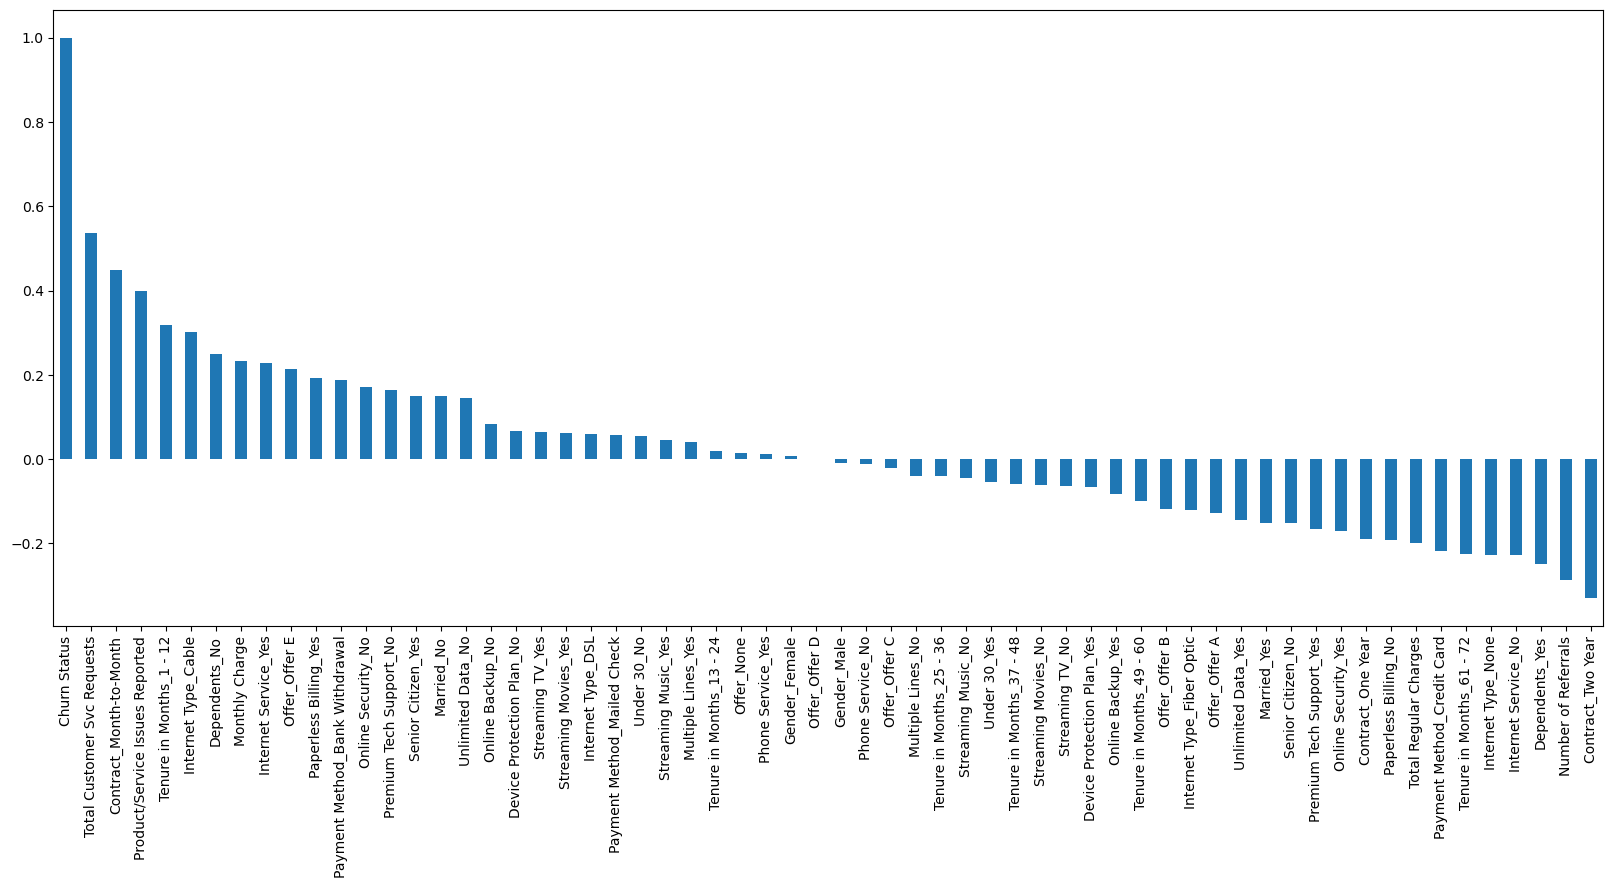

In [70]:
plt.figure(figsize=(20,8))
telecom_data_dummies.corr()['Churn Status'].sort_values(ascending = False).plot(kind='bar')

HIGH Churn seen in 
Month to month contracts, 
No online security, 
No preminum Tech support, 
senior citizens,
customers with offer E,
product/service issues reported 
First year of subscription and 
cable Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years,online security,tech support and payments through credit card.

Factors like Gender, Availability of PhoneService and multiple lines have almost no impact on Churn

This is also evident from the Heatmap below

<Axes: >

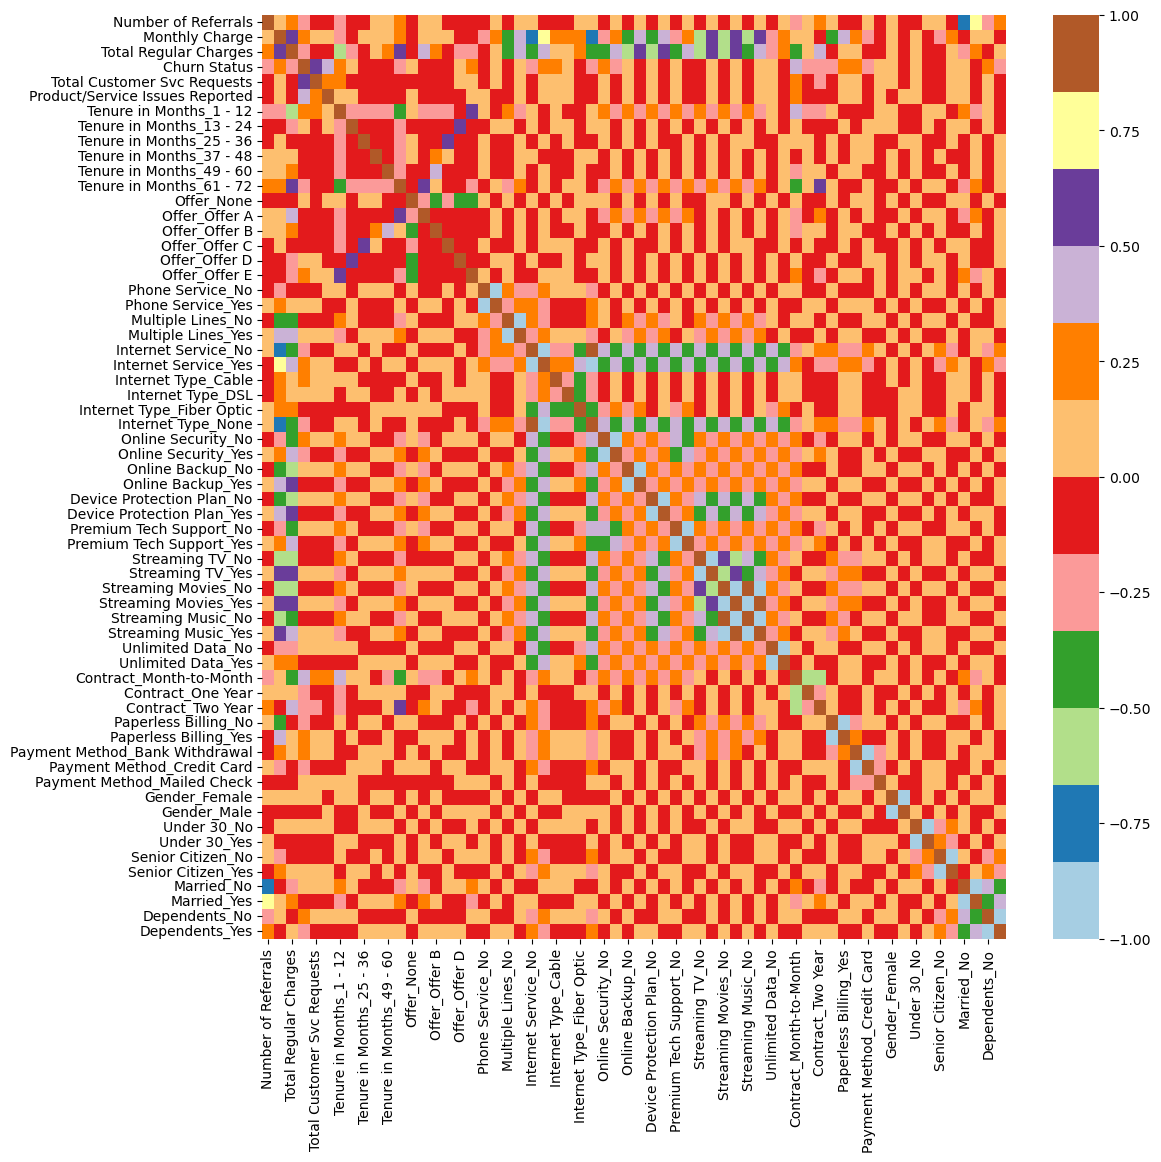

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(telecom_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [73]:
new_df1_target0=telecom_data.loc[telecom_data["Churn Status"]==0]
new_df1_target1=telecom_data.loc[telecom_data["Churn Status"]==1]

In [74]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

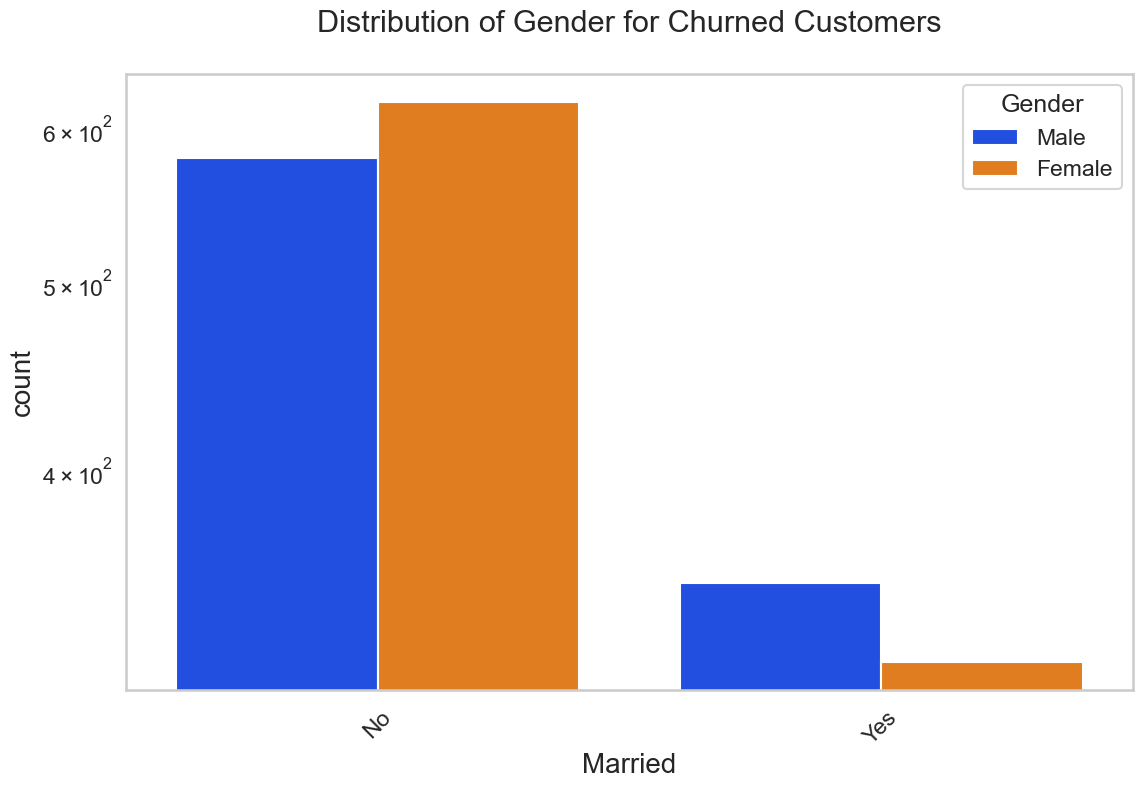

In [77]:
uniplot(new_df1_target1,col='Married',title='Distribution of Gender for Churned Customers',hue='Gender')

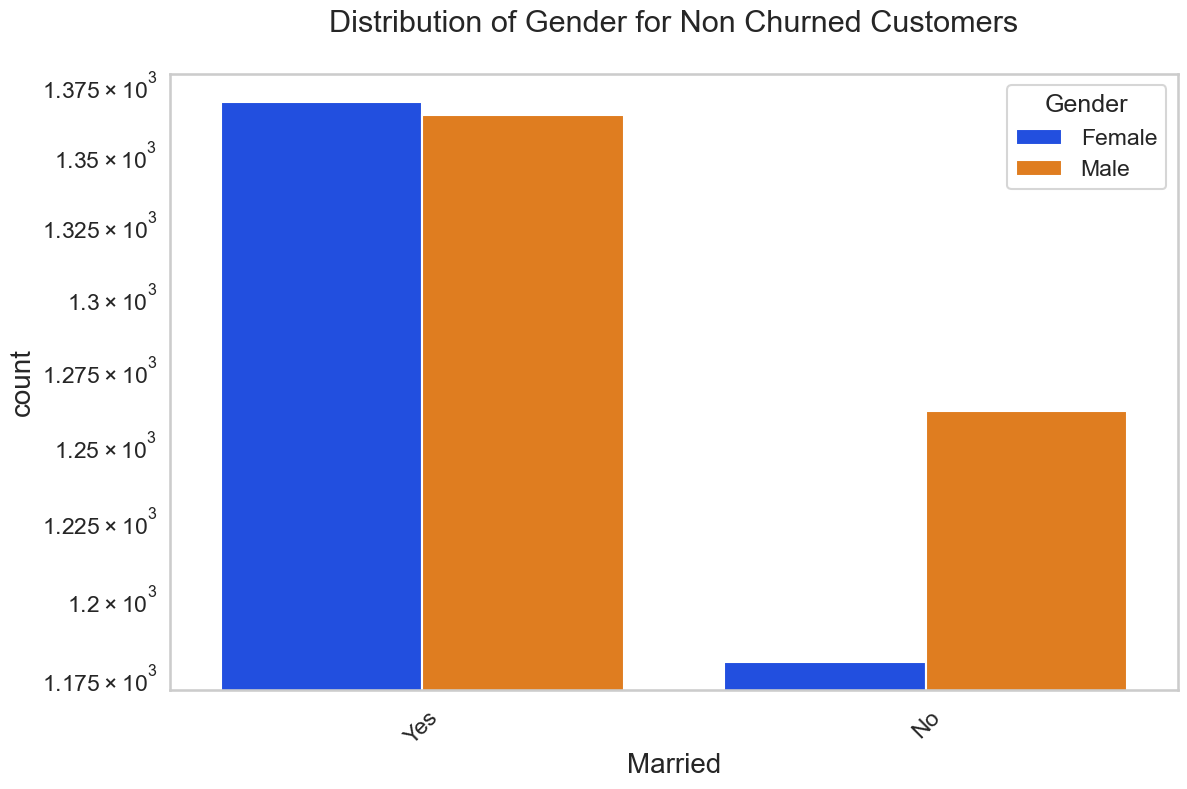

In [78]:
uniplot(new_df1_target0,col='Married',title='Distribution of Gender for Non Churned Customers',hue='Gender')

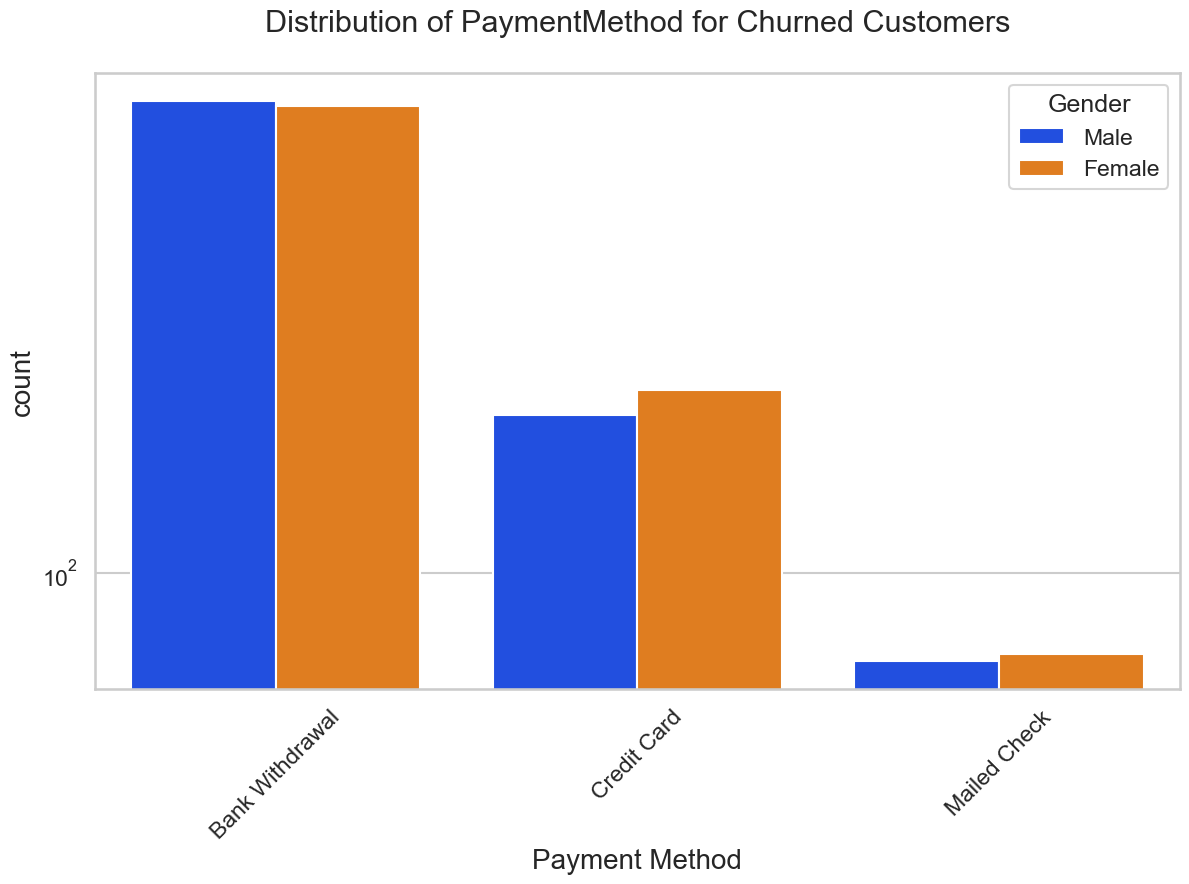

In [79]:
uniplot(new_df1_target1,col='Payment Method',title='Distribution of PaymentMethod for Churned Customers',hue='Gender')

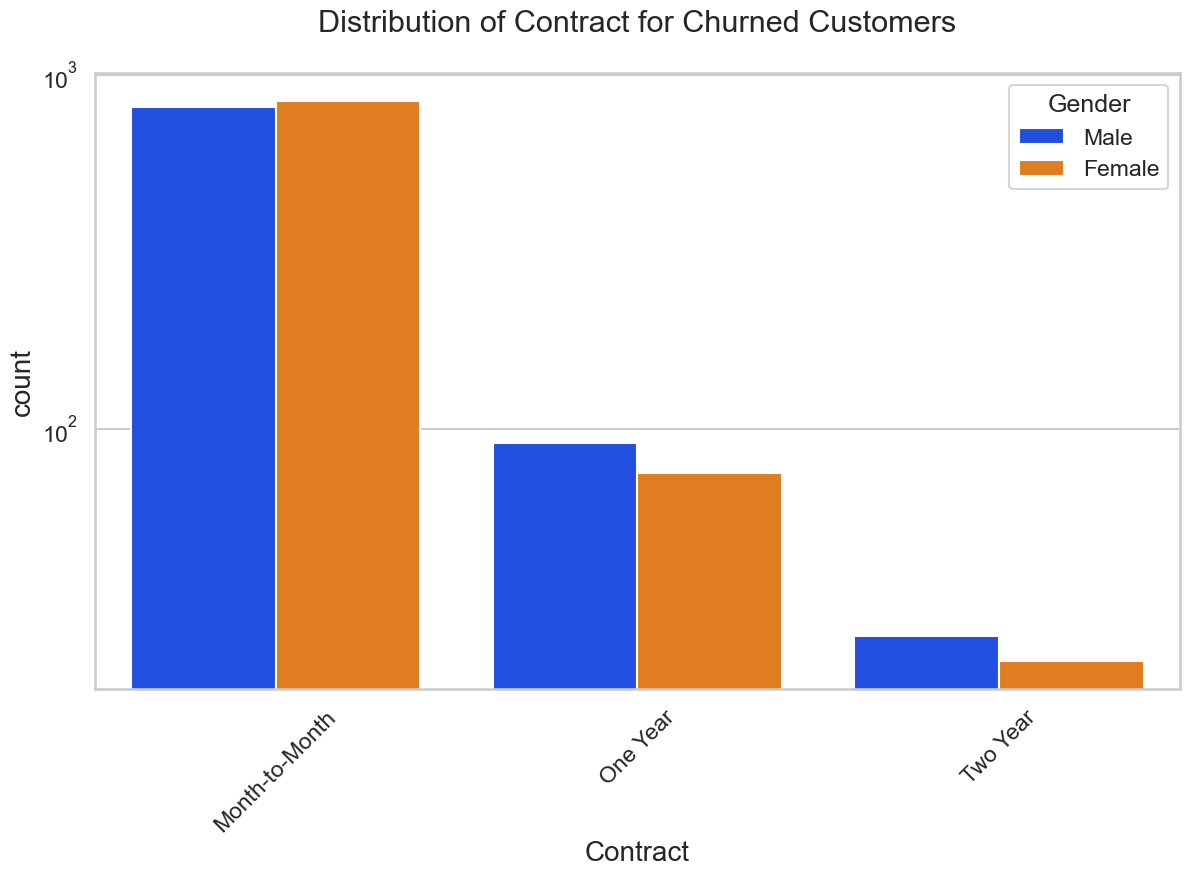

In [80]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='Gender')

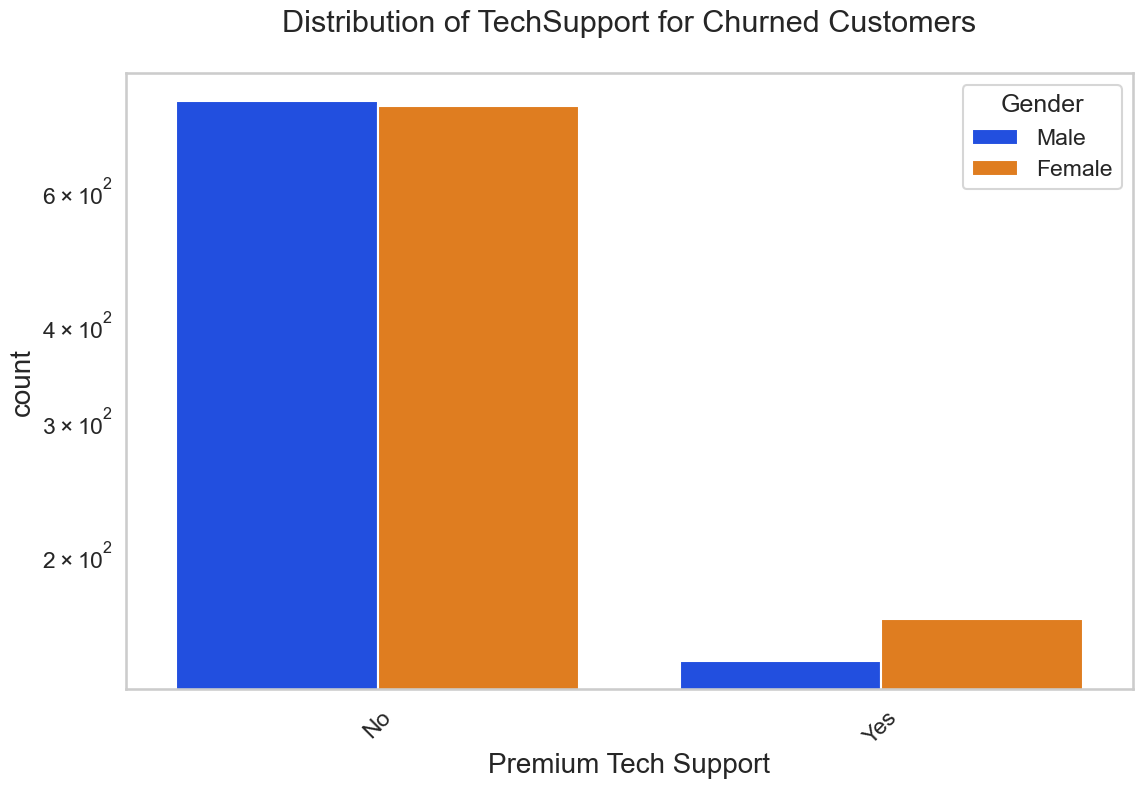

In [81]:
uniplot(new_df1_target1,col='Premium Tech Support',title='Distribution of TechSupport for Churned Customers',hue='Gender')

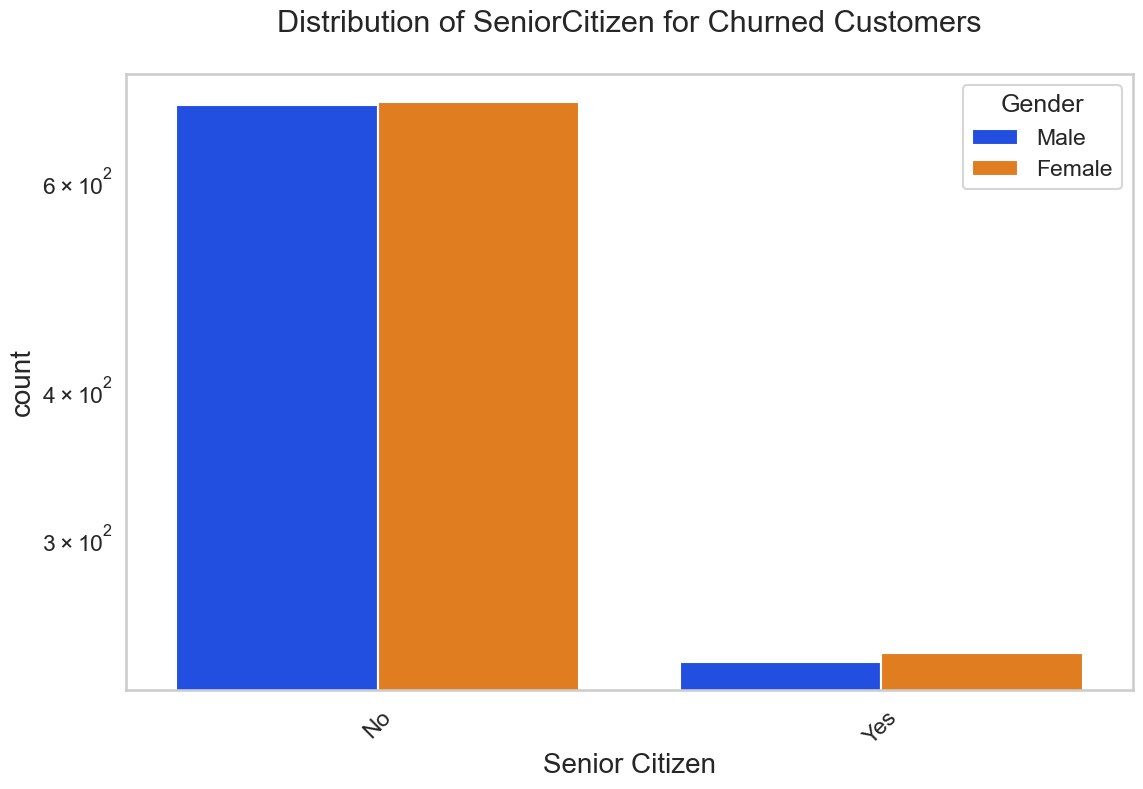

In [82]:
uniplot(new_df1_target1,col='Senior Citizen',title='Distribution of SeniorCitizen for Churned Customers',hue='Gender') 

# CONCLUSION

These are the insights from the plots:

1. Bank withdrawal medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
5.Married customers are non churners.


In [83]:
telecom_data_dummies.to_csv('tele_churn.csv')